<a href="https://colab.research.google.com/github/BU-Spark/ds-bu-sustainability-waste/blob/team-1-Zhengyu_Liu/preliminary_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [4]:
import pandas as pd

df = pd.read_csv("Sites_Report - Devices.csv", low_memory=False)
df.head()

,Category,Site Name,Timezone,GPS Latitude,GPS Longitude,Address Line 1,Address Line 2,City,Zip/Postal Code,State,Country
0,NaN,BU #102 Student Health Services,America/New_York,42.35,-71.11,881 Commonwealth Avenue,NaN,Boston,2215.0,MA,US
1,NaN,BU #105 Kilachand Hall,America/New_York,42.35,-71.10,91 Bay State Rd,NaN,Boston,2215.0,MA,US
2,NaN,BU #108 Agganis Arena,America/New_York,42.35,-71.12,925 Commonwealth Avenue,NaN,Boston,2215.0,MA,US
3,NaN,BU #18 - Warren Hall,America/New_York,42.35,-71.10,14 Buswell St,NaN,Boston,2215.0,MA,US
4,NaN,BU #2 Student Village,America/New_York,42.35,-71.12,10 Buick St,NaN,Boston,2215.0,MA,US


In [5]:
import folium

bos_map = folium.Map(location=[42.3505, -71.1054])
bos_map.save("raw_map.html")
bos_map

In [6]:
location_df = df[['GPS Latitude', 'GPS Longitude']].dropna()
location_df.head()

,GPS Latitude,GPS Longitude
0,42.35,-71.11
1,42.35,-71.10
2,42.35,-71.12
3,42.35,-71.10
4,42.35,-71.12


In [7]:
from folium.plugins import HeatMap

HeatMap(location_df).add_to(bos_map)
bos_map.save("heatmap.html")
bos_map

In [33]:
import datetime as dt
df1 = pd.read_csv("BU Daily Weights FY22.csv", low_memory=False)
df1.head()

,Customer Key,Location,Address,Work Order Date,Material,Tons
0,31582.0,200 Riverway,200 Riverway,6/27/2022,Trash,1.88
1,31582.0,200 Riverway,200 Riverway,6/9/2022,Trash,2.13
2,31582.0,200 Riverway,200 Riverway,5/24/2022,Trash,2.60
3,31582.0,200 Riverway,200 Riverway,5/14/2022,Trash,2.95
4,31582.0,200 Riverway,200 Riverway,5/7/2022,Trash,2.99


<ipython-input-59-a94868cf4281>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Work Order Date'] = pd.to_datetime(df2['Work Order Date'])
<ipython-input-59-a94868cf4281>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Work Order Date'].dt.strftime('%b-%Y')


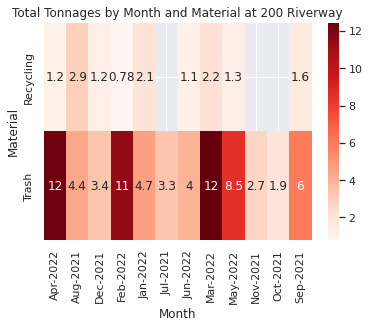

In [59]:

import seaborn as sns
import matplotlib.pyplot as plt
df2 = df1[df1['Location'] == '200 Riverway']
df2['Work Order Date'] = pd.to_datetime(df2['Work Order Date'])
df2['Month'] = df2['Work Order Date'].dt.strftime('%b-%Y')
df_grouped = df2.groupby(['Month', 'Material']).sum().reset_index()
heatmap_data = pd.pivot_table(df_grouped, values='Tons', index=['Material'], columns='Month')
sns.set(font_scale=1.0)
sns.heatmap(heatmap_data, annot=True, cmap='Reds')
plt.title('Total Tonnages by Month and Material at 200 Riverway')
plt.show()

#df2 = df2.sort_values(by='Work Order Date', ascending=False)
#print(df2)

<ipython-input-60-f78b8903fdf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Work Order Date'] = pd.to_datetime(df3['Work Order Date'])
<ipython-input-60-f78b8903fdf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = df3['Work Order Date'].dt.strftime('%b-%Y')


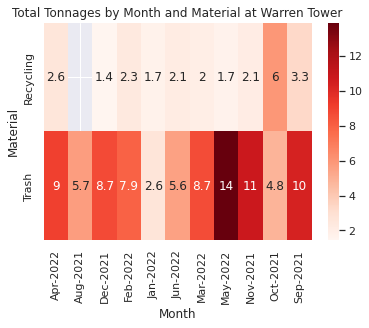

In [60]:
df3 = df1[df1['Address'] == '14 Buswell St']
df3['Work Order Date'] = pd.to_datetime(df3['Work Order Date'])
df3['Month'] = df3['Work Order Date'].dt.strftime('%b-%Y')
df_grouped = df3.groupby(['Month', 'Material']).sum().reset_index()
heatmap_data = pd.pivot_table(df_grouped, values='Tons', index=['Material'], columns='Month')
sns.set(font_scale=1.0)
sns.heatmap(heatmap_data, annot=True, cmap='Reds')
plt.title('Total Tonnages by Month and Material at Warren Tower')
plt.show()

<ipython-input-61-7d55a22abcfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Work Order Date'] = pd.to_datetime(df4['Work Order Date'])
<ipython-input-61-7d55a22abcfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Month'] = df4['Work Order Date'].dt.strftime('%b-%Y')


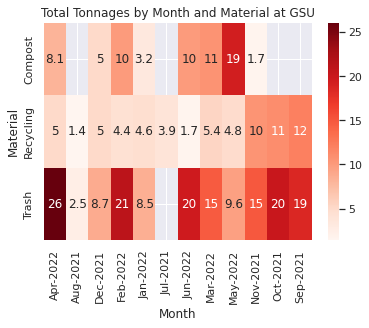

In [61]:
df4 = df1[df1['Address'] == '775 COMMONWEALTH AVE']
df4['Work Order Date'] = pd.to_datetime(df4['Work Order Date'])
df4['Month'] = df4['Work Order Date'].dt.strftime('%b-%Y')
df_grouped = df4.groupby(['Month', 'Material']).sum().reset_index()
heatmap_data = pd.pivot_table(df_grouped, values='Tons', index=['Material'], columns='Month')
sns.set(font_scale=1.0)
sns.heatmap(heatmap_data, annot=True, cmap='Reds')
plt.title('Total Tonnages by Month and Material at GSU')
plt.show()

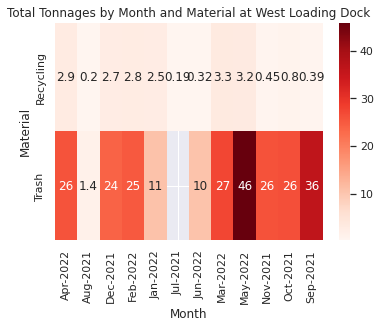

In [67]:
df5 = df1[df1['Address'] == '275 Babcock']
df5 = df5.drop(df5[df5['Material'] == 'Compost'].index)
df5['Work Order Date'] = pd.to_datetime(df5['Work Order Date'])
df5['Month'] = df5['Work Order Date'].dt.strftime('%b-%Y')
df_grouped = df5.groupby(['Month', 'Material']).sum().reset_index()
heatmap_data = pd.pivot_table(df_grouped, values='Tons', index=['Material'], columns='Month')
sns.set(font_scale=1.0)
sns.heatmap(heatmap_data, annot=True, cmap='Reds')
plt.title('Total Tonnages by Month and Material at West Loading Dock')
plt.show()